In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wf
import jax.numpy as jnp

In [3]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments/exp2_speech

c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp2_speech


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Importing speech signals and mixing them

In [4]:
s5_file='input/child-talking-theres-a-daddy.wav'
s4_file='input/talk-to-the-cashier-in-a-hardware-store.wav'
s3_file='input/mathias-words-request.wav'

In [5]:
sampling_rate_3, s3 = wf.read(s3_file)
print(s3.shape)
s3 = s3[:,0]

sampling_rate_4, s4 = wf.read(s4_file)
print(s4.shape)
s4 = s4[:,0]

sampling_rate_5, s5 = wf.read(s5_file)
print(s5.shape)

(682489, 2)
(1910016, 2)
(843972,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_18804\3925245323.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_3, s3 = wf.read(s3_file)


In [6]:
S=[s3,s4,s5]
S, X, Xw = mix_sources(S, False)
wf.write('./talks_mixture.wav', sampling_rate_5, X.mean(axis=0).astype(np.float32))

# ICA

In [7]:
W, mcc = fast_ica(Xw, 1, 1e-8, 5000, true_sources=S) #Nour's method.

component 0
iteration : 0 : distance 0.20294564962387085
----- MCC = 0.3429023957190414
iteration : 1 : distance 0.039206624031066895
----- MCC = 0.3304515218672653
iteration : 2 : distance 0.00046443939208984375
----- MCC = 0.6679499383705357
iteration : 3 : distance 0.0
----- MCC = 0.667949878765891
component 1
iteration : 0 : distance 0.2474239468574524
----- MCC = 0.6675695216593643
iteration : 1 : distance 0.0002740025520324707
----- MCC = 0.3417286113835871
iteration : 2 : distance 0.0
----- MCC = 0.6672964910200486
component 2
iteration : 0 : distance 0.297588586807251
----- MCC = 0.6673033852906277
iteration : 1 : distance 0.0
----- MCC = 0.6673033852906277


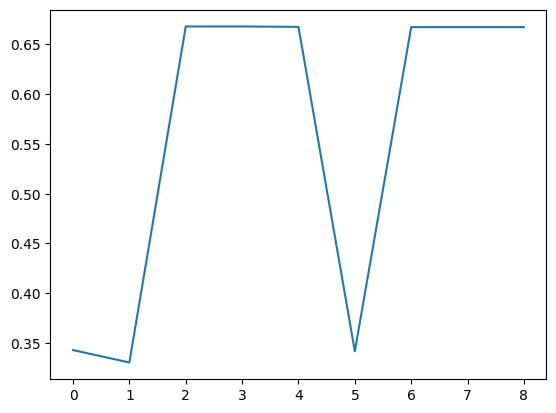

In [8]:
plt.plot(mcc)

In [9]:
unMixed = np.dot(W,Xw)


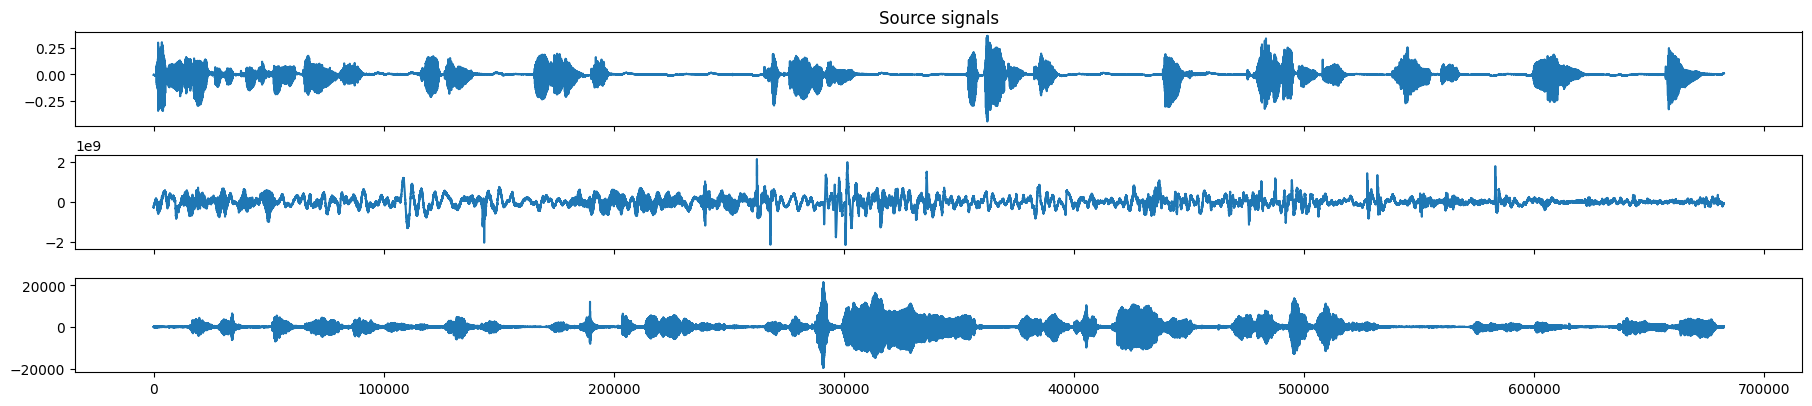

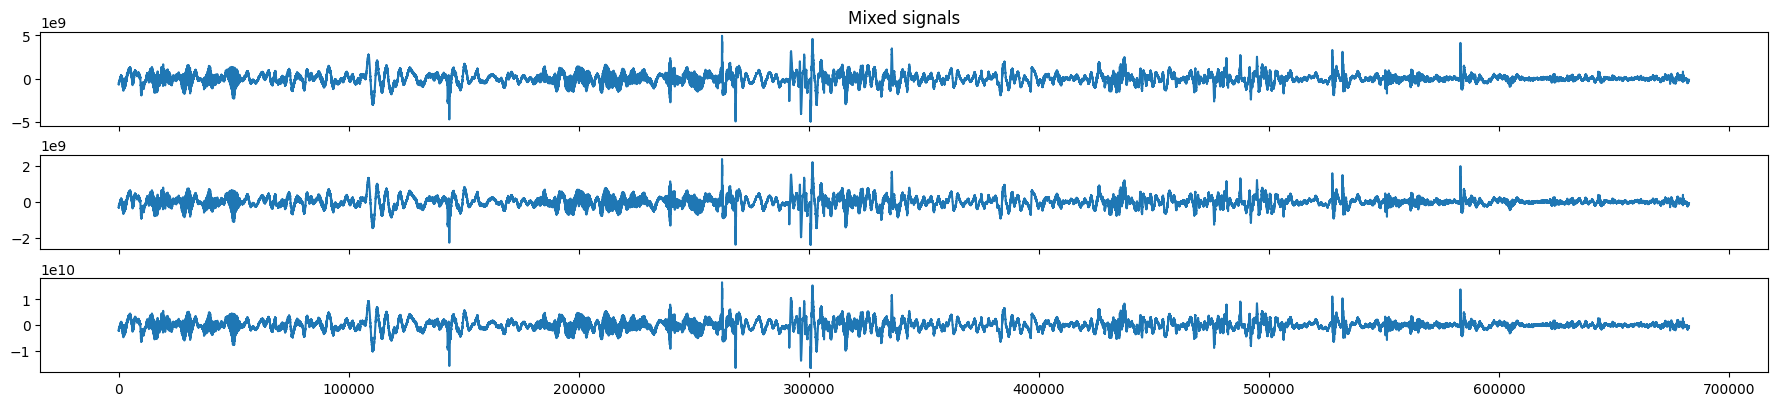

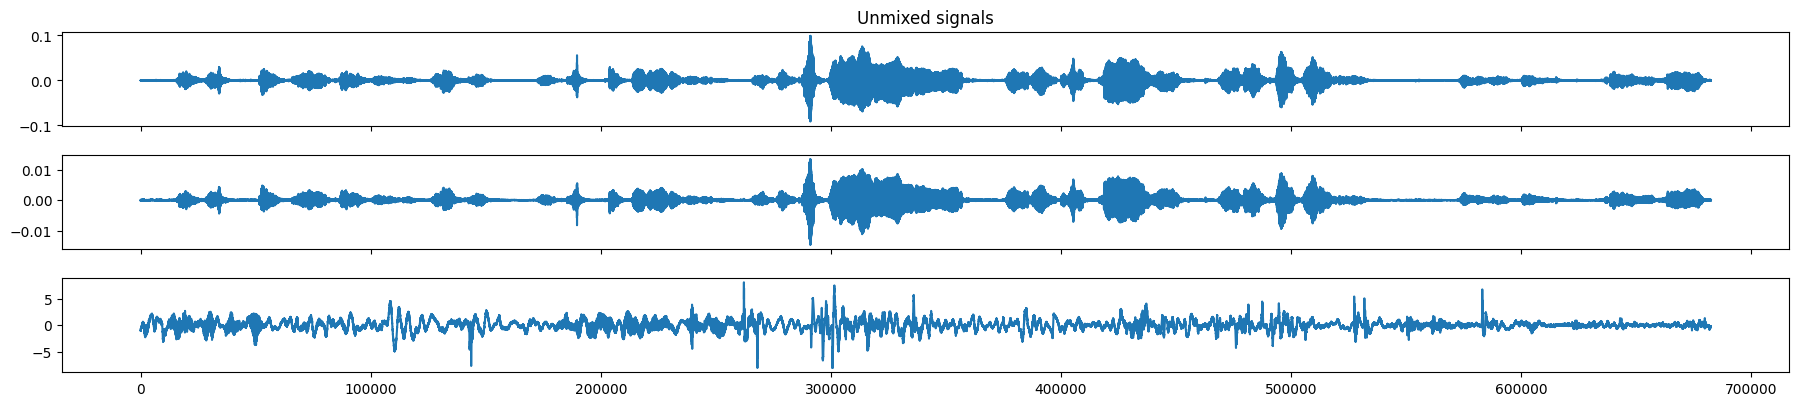

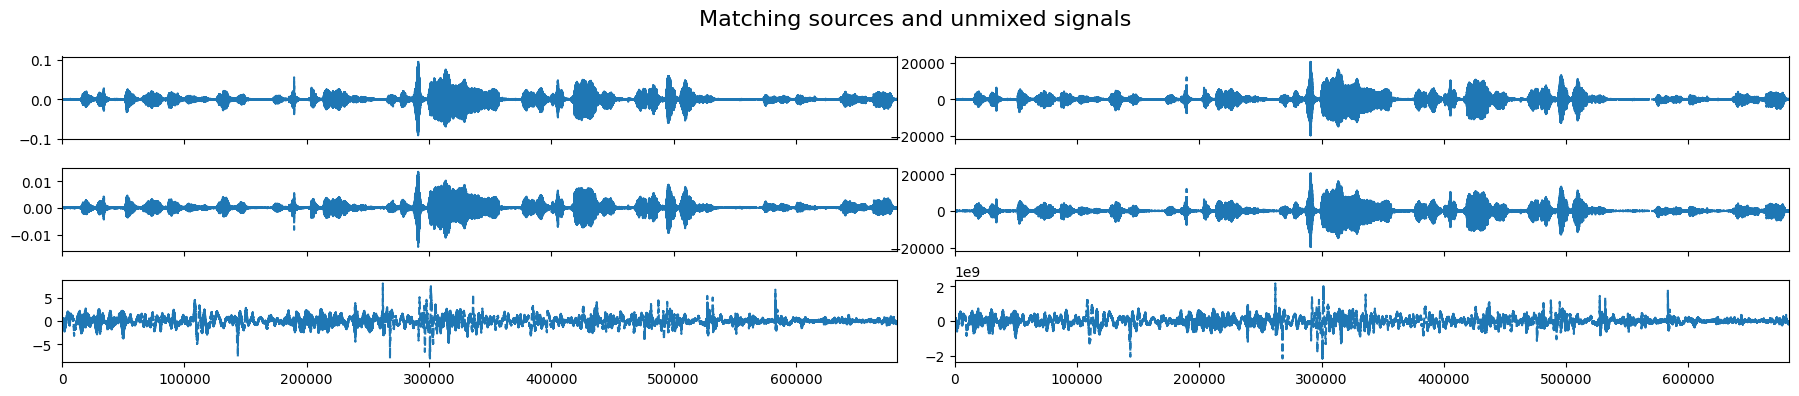

In [10]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)


fig, axes = plt.subplots(nrows=n_signals, ncols=2, figsize=(18, 4),sharex=True)
fig.suptitle('Matching sources and unmixed signals', fontsize=16)
fig.tight_layout()
for i in range(n_signals):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    axes[i,0].plot(unMixed[i,:].T,'--')
    axes[i,1].plot(S[perm].T,'--')
    plt.xlim(0, S.shape[1])


# Scaling sources before applying ICA

The signal that has very low amplitude is not recovered. We try again but this time we ensure the scaling is the same for all sources the sources beforehand : 

In [11]:
S, X, Xw = mix_sources(S)
W,mcc = fast_ica(Xw, 1, 1e-8, 5000,true_sources=S) #Nour's method.
unMixed = np.dot(W,Xw)


component 0
iteration : 0 : distance 0.0015580058097839355
----- MCC = 0.6668500701586405
iteration : 1 : distance 0.004943251609802246
----- MCC = 0.6787134210268656
iteration : 2 : distance 0.011590123176574707
----- MCC = 0.6908133427302042
iteration : 3 : distance 0.008101999759674072
----- MCC = 0.6950862805048624
iteration : 4 : distance 0.0004901885986328125
----- MCC = 0.6953151424725851
iteration : 5 : distance 6.079673767089844e-06
----- MCC = 0.6953222354253134
iteration : 6 : distance 6.556510925292969e-07
----- MCC = 0.6953235864639282
iteration : 7 : distance 1.7881393432617188e-07
----- MCC = 0.6953240831693014
iteration : 8 : distance 0.0
----- MCC = 0.6953242421150208
component 1
iteration : 0 : distance 0.165926992893219
----- MCC = 0.7619003852208456
iteration : 1 : distance 0.017153680324554443
----- MCC = 0.7673173149426779
iteration : 2 : distance 3.123283386230469e-05
----- MCC = 0.7673205335934957
iteration : 3 : distance 1.1920928955078125e-06
----- MCC = 0.767

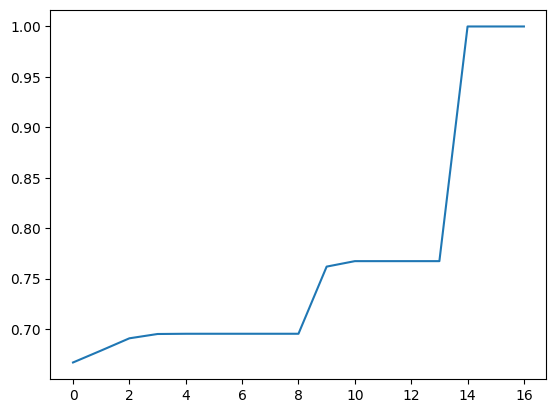

In [12]:
plt.plot(mcc)

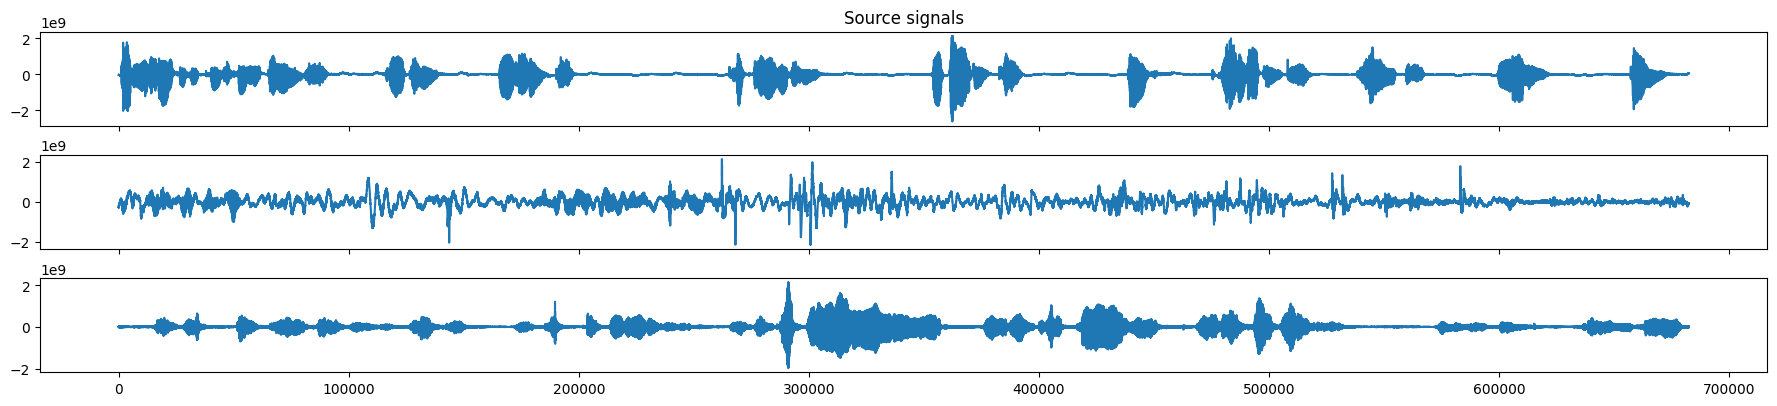

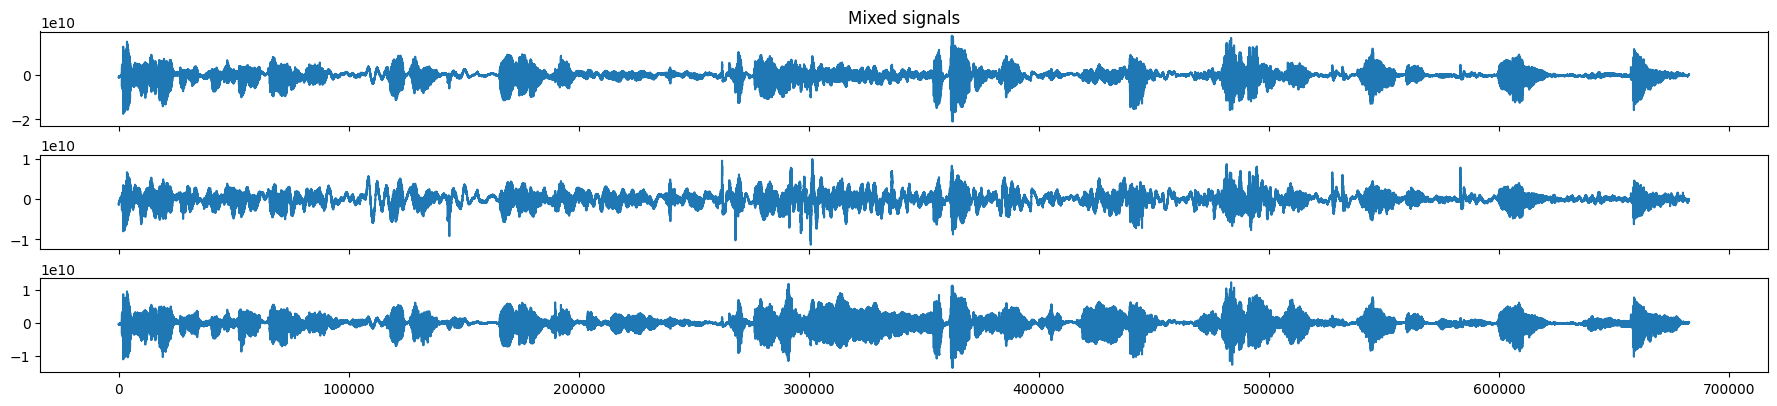

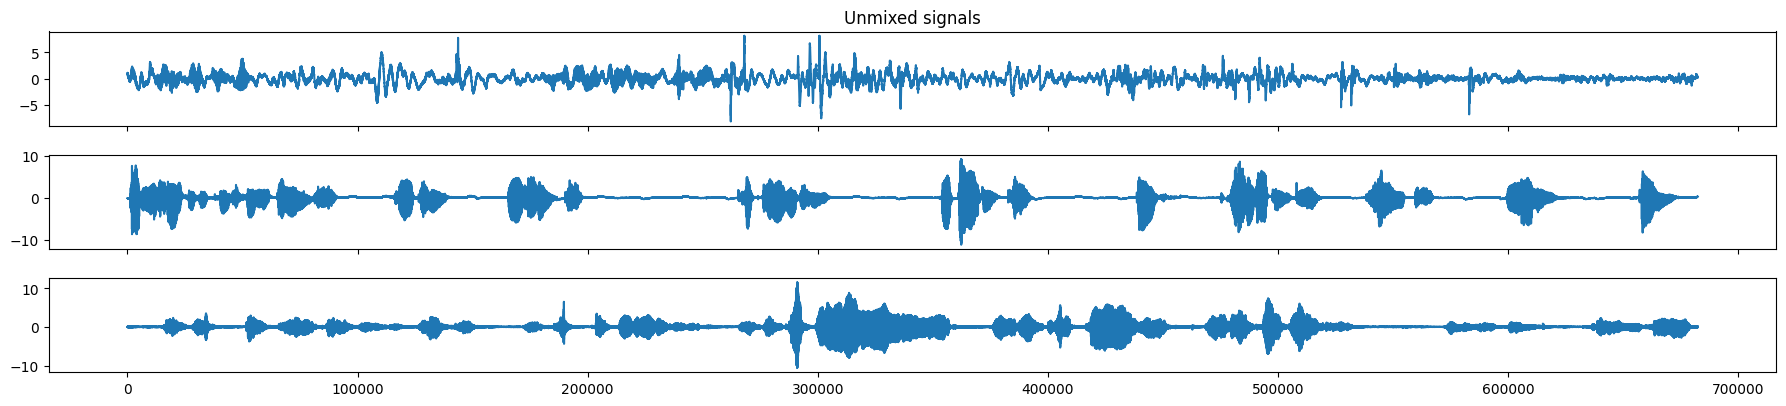

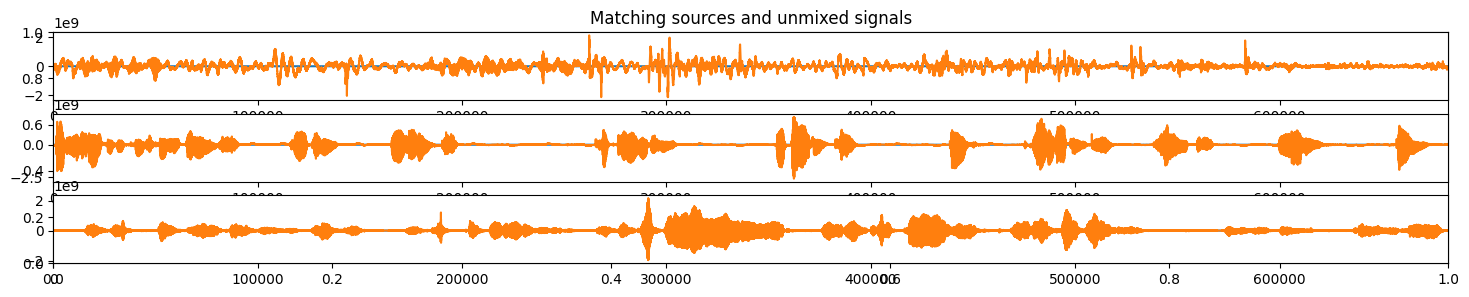

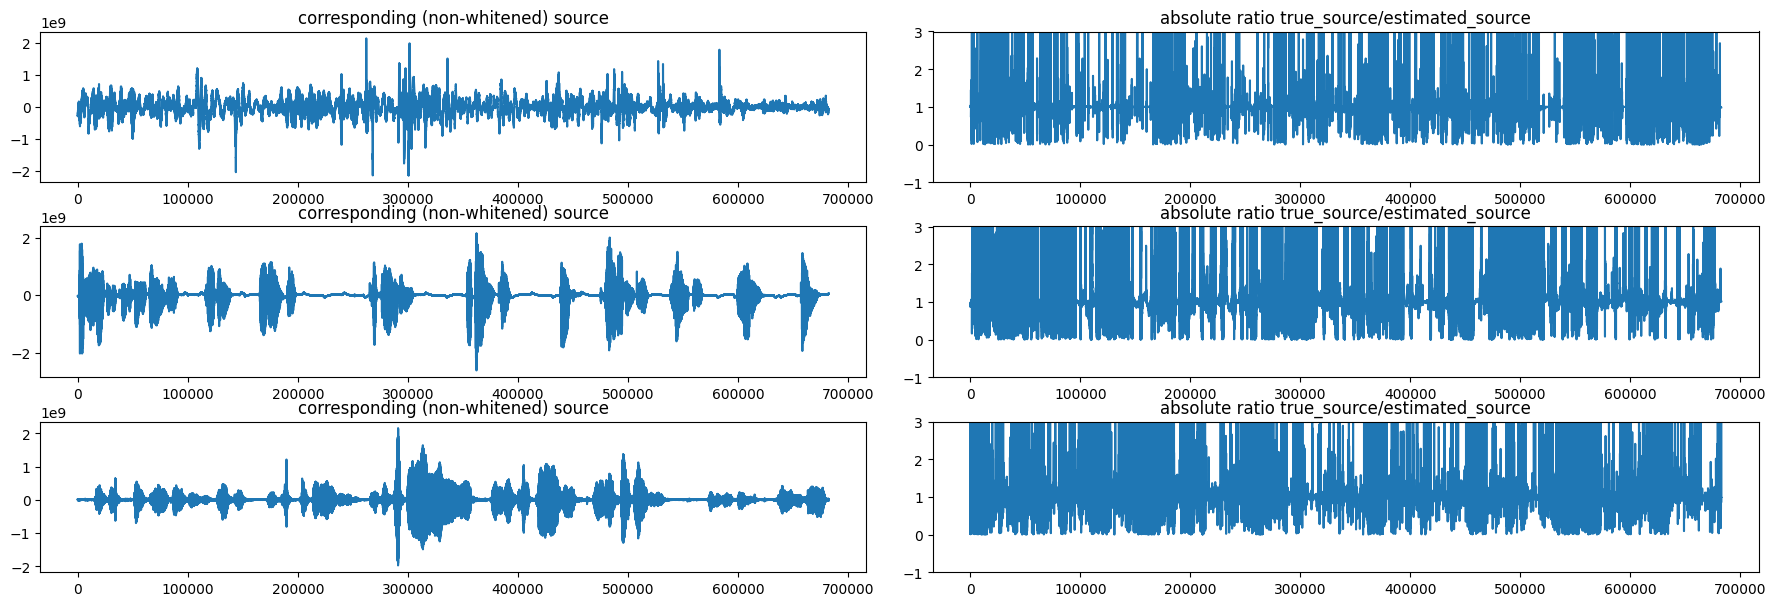

In [28]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)


perm = jnp.argmax(jnp.abs(unMixed @ S.T),
                    axis=0)
fig, axes = plt.subplots(3, 2, figsize=[18, 6])
fig.tight_layout()
for i in range(n_signals):
    axes[i,0].plot(S[perm[i]])
    axes[i,0].set_title('corresponding (non-whitened) source')
    axes[i,1].plot(np.abs(unMixed[i] / Sw[perm[i]]), '-')
    axes[i,1].set_title('absolute ratio true_source/estimated_source')
    axes[i,1].set_ylim(-1,3)
plt.show()

In [14]:
wf.write('output/s3_predicted.wav', sampling_rate_5, unMixed[0].astype(np.float32))
wf.write('output/s4_predicted.wav', sampling_rate_5, unMixed[1].astype(np.float32))
wf.write('output/s5_predicted.wav', sampling_rate_5, unMixed[2].astype(np.float32))

In [19]:
%cd ..

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis


In [20]:
# LaTeX code for the subplot
subplot_code_ = r'''
\nextgroupplot[
        title=Evolution of MCC during FastICA algorithm iterations on real speech data,
        xlabel={iterations},
        ylabel={MCC Score},
        xmin=0, xmax=%d,
        ymin=%f, ymax=%f
        ]
\addplot[
    color=blue,
] coordinates {
    %s
};
''' % (len(mcc)-1, min(mcc)-0.1, 1, ' '.join(f'({i},{score:.2f})' for i, score in enumerate(mcc)))

# Save the LaTeX code to a file
file_path = 'report/figures_latex/mcc_speech_fastica.tex'  # Path to save the .tex file
with open(file_path, 'w') as file:
    file.write(subplot_code_.strip())


In [21]:
n_sources=S.shape[0]

In [29]:
# Generate LaTeX code for the figure
latex_figure_code = r"""
\begin{figure}[H]
\centering
\begin{tikzpicture}
\begin{axis}[
    title={Ratio signals},
    xlabel={Sample number},
    ylabel={},
    xmin=0, xmax=1000,
    ymin=-1.5, ymax=1.5,
    legend pos=north east,
    xmajorgrids=true,
    ymajorgrids=true,
    grid style=dashed,
    width=\textwidth,
    height=8cm,
    label style={font=\large},
    title style={font=\Large},
]
"""

# Loop over each source to add plots to the LaTeX code
for i in range(n_sources):
    # Simulate the ratio signal
    ratio_signal = np.abs(unMixed[perm[i]] / Sw[i])
    # Create a data file for each source
    data_filename = f'report/data/ratio_toy_sources_{i+1}.dat'
    with open(data_filename, 'w') as f:
        for j in range(S.shape[1]):
            f.write(f"{j} {ratio_signal[j]:.2f}\n")
    
    # Add plot to the LaTeX code for each source
    latex_figure_code += rf"""\addplot[color=blue, no marks] table {{data/ratio_toy_sources_{i+1}.dat}};
    \addlegendentry{{Recovered signals {i+1}}}
"""

# Close the axis and tikzpicture environments
latex_figure_code += r"""
\end{axis}
\end{tikzpicture}
\caption{Plot of ratio signals for each source.}
\end{figure}
"""

# Save the LaTeX code to a .tex file
latex_file_path = 'report/figures_latex/ratio_toy_sources.tex'
with open(latex_file_path, 'w') as file:
    file.write(latex_figure_code)

